<a href="https://colab.research.google.com/github/Cristian-Cortez/CSE337-labs/blob/main/lab3_TD_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Temporal Difference Learning

In this lab, we will practice TD Learning methods, including SARSA and Q-Learning. Both are tabular methods that work on finite MDP.

We will solve the cliff problem: https://gymnasium.farama.org/environments/toy_text/cliff_walking/#is_slippy


The following code runs in colab, if you want to see the animation, you have to run it using python locally on your computer and replacing render_mode="ansi" for render_mode="human".

Thef follwing code runs the cliff problem using a random policy.

In [ ]:
import gymnasium as gym

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 5      # number of episodes to run
max_steps = 100     # safety cap

for episode in range(n_episodes):
    state, info = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Random policy: sample an action uniformly
        action = env.action_space.sample()

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        state = next_state

        if terminated or truncated:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")

env.close()

Episode 1: total reward = -1486
Episode 2: total reward = -1981
Episode 3: total reward = -991
Episode 4: total reward = -793
Episode 5: total reward = -1288


## Exercise 1: SARSA
Implement SARSA to solve the cliff problem above. Recommendations:



1. Define your Q table, as a matrix of [number of states] x [number of actions]
2. Greedy policy: Write a function that receives a state, the Q table, and returns the best action (the one with the maximum Q value).
3. $\epsilon$-greedy: Wreite a function that chooses the greedy policy with $\epsilon$ probality, and chooses a random actions with 1-$\epsilon$ probability.
4. Implement the SARSA algorithm based on the pseudo-code



In [71]:

import gymnasium as gym
import numpy as np
import random


def greedy(state, Q):
  return np.argmax(Q[state])

def epsilon_greedy(state, Q, epsilon, n_actions):
  if random.uniform(0, 1) < epsilon:
      return random.randint(0, n_actions-1)
  else:
      return greedy(state, Q)

def sarsa_algo(isSlippery):
  # Create the environment
  print(isSlippery)
  env = gym.make("CliffWalking-v1", render_mode="ansi", is_slippery = isSlippery)

  n_episodes = 1000      # number of episodes to run
  max_steps = 100     # safety cap

  # Q-learning parameters
  learning_rate = 0.1
  discount_factor = 0.99
  n_actions = env.action_space.n
  n_states = env.observation_space.n
  Q = np.zeros((n_states, n_actions))
  max_steps = 100     # safety cap

  total_reward_sarsa = []

  for episode in range(n_episodes):
      state, info = env.reset()
      done = False
      total_reward = 0
      action = epsilon_greedy(state, Q, 0.05 , n_actions)

      for step in range(max_steps):
          # Random policy: sample an action uniformly
          #action = env.action_space.sample()
          next_state, reward, terminated, truncated, info = env.step(action)

          next_action = epsilon_greedy(next_state, Q, 0.05 , n_actions)

          Q[state, action] = Q[state, action] + learning_rate * (reward + (discount_factor * Q[next_state, next_action]) - Q[state, action])

          total_reward += reward
          state = next_state
          action = next_action

          if terminated or truncated:
              break
      total_reward_sarsa.append(total_reward)
      print(f"Episode {episode+1}: total reward = {total_reward}")
  return total_reward_sarsa, Q


sarsa_rewards, sarsa_Q = sarsa_algo(False)

#n_episodes = 10      # number of episodes to run






False
Episode 1: total reward = -100
Episode 2: total reward = -332
Episode 3: total reward = -298
Episode 4: total reward = -298
Episode 5: total reward = -199
Episode 6: total reward = -199
Episode 7: total reward = -199
Episode 8: total reward = -199
Episode 9: total reward = -199
Episode 10: total reward = -100
Episode 11: total reward = -199
Episode 12: total reward = -100
Episode 13: total reward = -199
Episode 14: total reward = -100
Episode 15: total reward = -73
Episode 16: total reward = -199
Episode 17: total reward = -100
Episode 18: total reward = -100
Episode 19: total reward = -83
Episode 20: total reward = -100
Episode 21: total reward = -46
Episode 22: total reward = -95
Episode 23: total reward = -100
Episode 24: total reward = -99
Episode 25: total reward = -100
Episode 26: total reward = -82
Episode 27: total reward = -55
Episode 28: total reward = -100
Episode 29: total reward = -49
Episode 30: total reward = -189
Episode 31: total reward = -88
Episode 32: total re

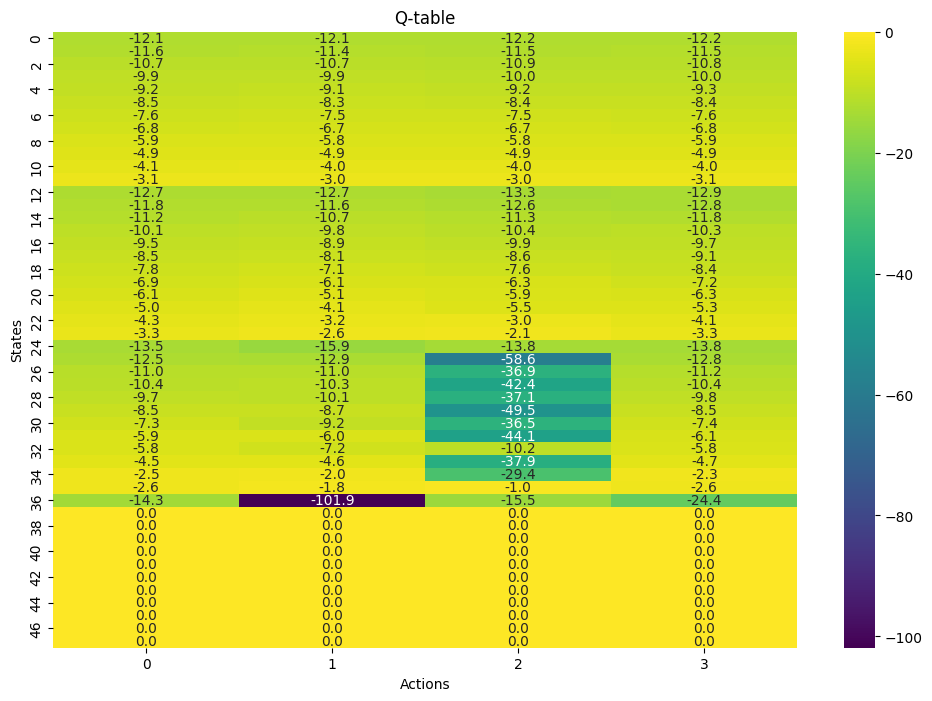

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_Q(Q):
  plt.figure(figsize=(12, 8))
  sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
  plt.xlabel("Actions")
  plt.ylabel("States")
  plt.title("Q-table")
  plt.show()

plot_Q(sarsa_Q)

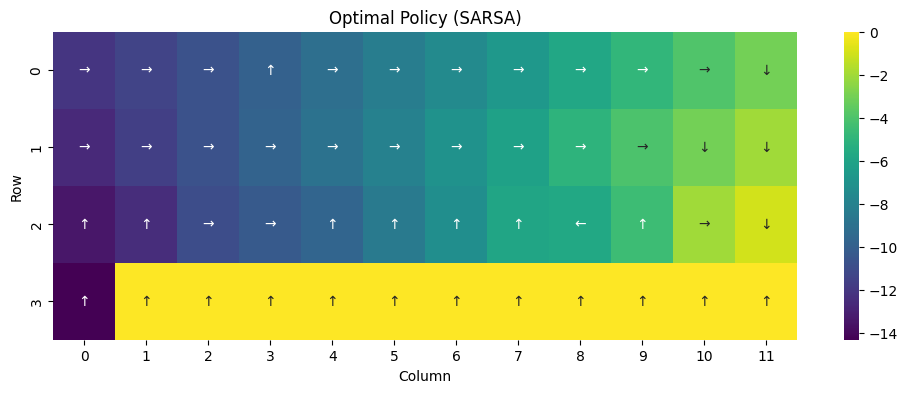

In [74]:
def plot_policy(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 12, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy (SARSA)")
  plt.show()
plot_policy(sarsa_Q)

## Exercise 2.1: Q: Learning
Implement Q-learning method to solve the cliff problem

In [87]:

import gymnasium as gym
import numpy as np
import random

def q_learning_algo(isSlippery):
  # Create the environment
  env = gym.make("CliffWalking-v1", render_mode="ansi", is_slippery = isSlippery)

  n_episodes = 1000      # number of episodes to run
  max_steps = 100     # safety cap

  # Q-learning parameters
  learning_rate = 0.1
  discount_factor = 0.99
  n_actions = env.action_space.n
  n_states = env.observation_space.n
  Q = np.zeros((n_states, n_actions))




  #n_episodes = 10      # number of episodes to run
  max_steps = 100     # safety cap
  total_reward_q = []

  for episode in range(n_episodes):
      state, info = env.reset()
      done = False
      total_reward = 0
      #action = epsilon_greedy(state, Q, 0.01 , n_actions)

      for step in range(max_steps):
          # Random policy: sample an action uniformly
          #action = env.action_space.sample()
          action = epsilon_greedy(state, Q, 0.05 , n_actions)
          next_state, reward, terminated, truncated, info = env.step(action)


          max_action = max(Q[next_state])

          Q[state, action] = Q[state, action] + learning_rate * (reward + (discount_factor * max_action - Q[state, action]))

          total_reward += reward
          state = next_state
          #action = next_action

          if terminated or truncated:
              break

      total_reward_q.append(total_reward)
      print(f"Episode {episode+1}: total reward = {total_reward}")

  return total_reward_q, Q

q_rewards, q_Q = q_learning_algo(False)



Episode 1: total reward = -100
Episode 2: total reward = -139
Episode 3: total reward = -298
Episode 4: total reward = -298
Episode 5: total reward = -397
Episode 6: total reward = -298
Episode 7: total reward = -199
Episode 8: total reward = -100
Episode 9: total reward = -199
Episode 10: total reward = -199
Episode 11: total reward = -100
Episode 12: total reward = -100
Episode 13: total reward = -87
Episode 14: total reward = -100
Episode 15: total reward = -100
Episode 16: total reward = -298
Episode 17: total reward = -94
Episode 18: total reward = -199
Episode 19: total reward = -100
Episode 20: total reward = -100
Episode 21: total reward = -100
Episode 22: total reward = -197
Episode 23: total reward = -85
Episode 24: total reward = -77
Episode 25: total reward = -100
Episode 26: total reward = -298
Episode 27: total reward = -199
Episode 28: total reward = -66
Episode 29: total reward = -199
Episode 30: total reward = -60
Episode 31: total reward = -72
Episode 32: total reward

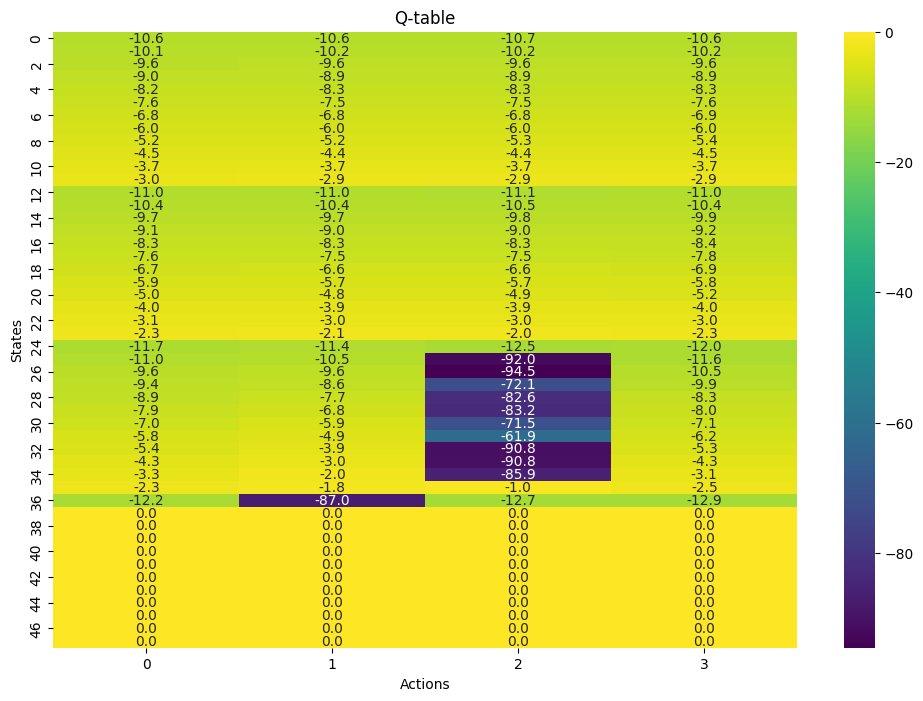

In [88]:
plot_Q(q_Q)

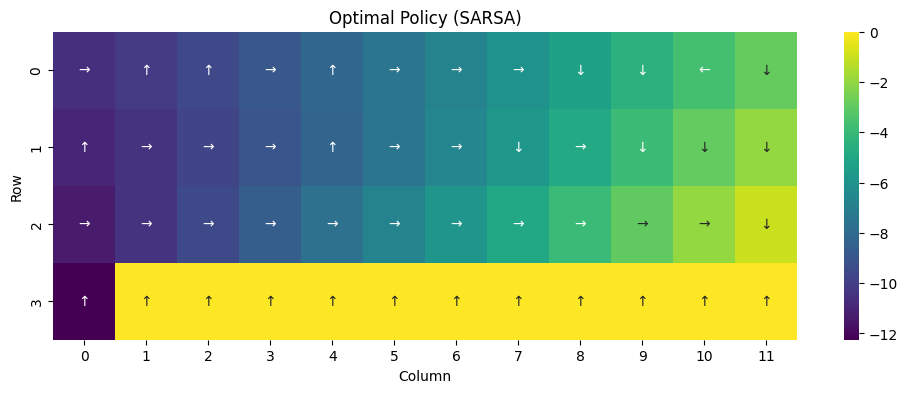

In [89]:
plot_policy(Q, "Q-Learning")

## Exercise 2.2: SARSA vs Q-learning
 1. Compare the results betwen SARSA and Q-Learning (plot a graph of the sum of rewards duing each episode for each algorithm).
 2. Include the is_slippery=True parameter. Compare again, which one is better?


1. The SARSA algorithm seems to be much more conistent in getting higher rewards than the q learning algorithm. This can be seen in the graph because the q-learning line goes far below the SARSA line for the majority of the episodes.

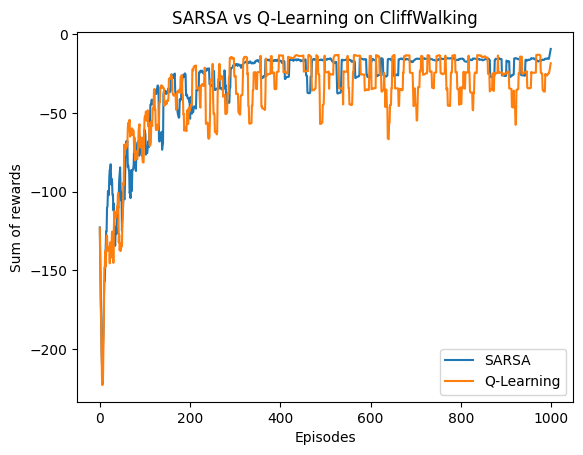

In [96]:
def smooth(y, box_pts=10):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode="same")
    return y_smooth

plt.plot(smooth(sarsa_rewards), label="SARSA")
plt.plot(smooth(q_rewards), label="Q-Learning")
plt.xlabel("Episodes")
plt.ylabel("Sum of rewards")
plt.title("SARSA vs Q-Learning on CliffWalking")
plt.legend()
plt.show()

2. Overall, the SARSA algorithm seems to be much more consistent than the Q-Learning algorithm when is_slippery is true. The Q-Learning algorithm consistently has less rewards than the SARSA algorithm, as seem by the graph. While it on occasion will have higher rewards, SARSA is much more consistent.

True
Episode 1: total reward = -595
Episode 2: total reward = -793
Episode 3: total reward = -298
Episode 4: total reward = -298
Episode 5: total reward = -298
Episode 6: total reward = -397
Episode 7: total reward = -100
Episode 8: total reward = -298
Episode 9: total reward = -100
Episode 10: total reward = -199
Episode 11: total reward = -397
Episode 12: total reward = -199
Episode 13: total reward = -66
Episode 14: total reward = -100
Episode 15: total reward = -100
Episode 16: total reward = -199
Episode 17: total reward = -199
Episode 18: total reward = -199
Episode 19: total reward = -100
Episode 20: total reward = -100
Episode 21: total reward = -100
Episode 22: total reward = -100
Episode 23: total reward = -298
Episode 24: total reward = -199
Episode 25: total reward = -199
Episode 26: total reward = -199
Episode 27: total reward = -199
Episode 28: total reward = -100
Episode 29: total reward = -100
Episode 30: total reward = -199
Episode 31: total reward = -199
Episode 32: t

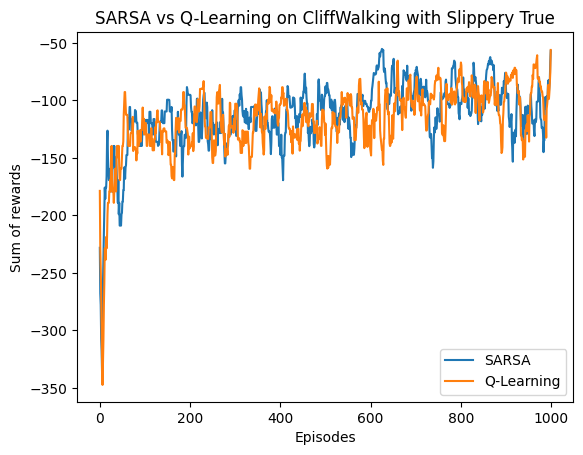

In [95]:
sarsa_slippery, _ = sarsa_algo(True)
q_slippery, _ = q_learning_algo(True)

plt.plot(smooth(sarsa_slippery), label="SARSA")
plt.plot(smooth(q_slippery), label="Q-Learning")
plt.xlabel("Episodes")
plt.ylabel("Sum of rewards")
plt.title("SARSA vs Q-Learning on CliffWalking with Slippery True")
plt.legend()
plt.show()

# Exercise 3 (graduate students): 8x8 grid problem
Solve the 8x8 grid problem from the previous lab. You can use SARSA or Q-learning. How many episodes does it need to learn the optimal policy?
